In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [78]:
df = pd.read_csv("TOTALENERGIES_2023-01-25.txt",sep="\t", header = 0)
#df = pd.read_csv("TOTALENERGIES_2023-01-25 (2).txt",sep="\t", header = 0)
#df = pd.read_csv("test2.csv")

In [3]:
#df

In [79]:
df_stock = df['haut']
#df_stock = df["Passengers"]

In [80]:
df_stock=df_stock.values[:].astype("float32")
df_stock.shape

(229,)

In [6]:
df_stock

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

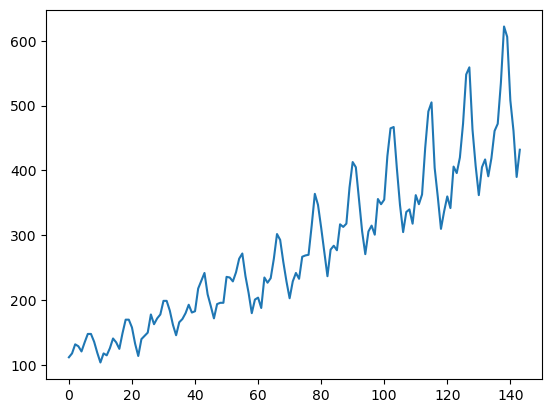

In [7]:
plt.plot(df_stock)

In [8]:
df_stock = df_stock.reshape(df_stock.shape[0], 1)
df_stock.shape

(144, 1)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_stock)

In [10]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

115 29


In [69]:
print(train.shape)
print(test.shape)

(115, 1)
(29, 1)


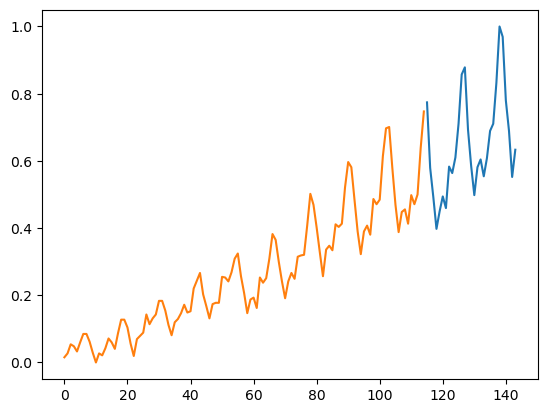

In [11]:
plt.plot(range(train_size, len(df_stock)), test)
plt.plot(range(0,train_size), train)

In [49]:
look_back = 14

In [50]:
def create_dataset(dataset,look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [51]:
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [52]:
trainX

array([[0.01544401, 0.02702703, 0.05405405, ..., 0.02702703, 0.02123553,
        0.04247104],
       [0.02702703, 0.05405405, 0.04826255, ..., 0.02123553, 0.04247104,
        0.07142857],
       [0.05405405, 0.04826255, 0.03281853, ..., 0.04247104, 0.07142857,
        0.05984557],
       ...,
       [0.48648646, 0.47104248, 0.484556  , ..., 0.4131274 , 0.4980695 ,
        0.47104248],
       [0.47104248, 0.484556  , 0.6138996 , ..., 0.4980695 , 0.47104248,
        0.49999997],
       [0.484556  , 0.6138996 , 0.6969112 , ..., 0.47104248, 0.49999997,
        0.6389961 ]], dtype=float32)

In [59]:
model = Sequential()
model.add(LSTM(input_shape=(look_back,1), units=100, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(units=1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 14, 100)           40800     
                                                                 
 lstm_21 (LSTM)              (None, 50)                30200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
#print(history.params["epochs"])

Epoch 1/10
101/101 - 1s - loss: 0.0015 - accuracy: 0.0000e+00 - 1s/epoch - 14ms/step
Epoch 2/10
101/101 - 1s - loss: 0.0011 - accuracy: 0.0000e+00 - 1s/epoch - 11ms/step
Epoch 3/10
101/101 - 1s - loss: 9.6334e-04 - accuracy: 0.0000e+00 - 1s/epoch - 11ms/step
Epoch 4/10
101/101 - 1s - loss: 0.0013 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 5/10
101/101 - 1s - loss: 0.0012 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 6/10
101/101 - 1s - loss: 0.0014 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 7/10
101/101 - 1s - loss: 0.0014 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 8/10
101/101 - 1s - loss: 0.0010 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 9/10
101/101 - 1s - loss: 0.0012 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 10/10
101/101 - 1s - loss: 9.7648e-04 - accuracy: 0.0000e+00 - 1s/epoch - 10ms/step


In [58]:
Predict

array([[[0.8401311 ],
        [0.69255394],
        [0.6400782 ],
        [0.64056176],
        [0.6788248 ],
        [0.68777287],
        [0.6784833 ],
        [0.6578963 ],
        [0.6457696 ],
        [0.6385151 ],
        [0.63152856],
        [0.61697966],
        [0.59447134],
        [0.573629  ]],

       [[0.6514261 ],
        [0.6022843 ],
        [0.5316564 ],
        [0.5570363 ],
        [0.58175135],
        [0.5943511 ],
        [0.5769514 ],
        [0.56323457],
        [0.54869354],
        [0.5356746 ],
        [0.5136961 ],
        [0.48715338],
        [0.47159594],
        [0.45710725]],

       [[0.5617211 ],
        [0.5049398 ],
        [0.52753353],
        [0.53808475],
        [0.5477091 ],
        [0.5527978 ],
        [0.5465021 ],
        [0.52688795],
        [0.505464  ],
        [0.47726223],
        [0.45147103],
        [0.4423358 ],
        [0.43502906],
        [0.4345642 ]],

       [[0.46324772],
        [0.53824246],
        [0.55892426],
    

1/1 [==============================] - 2s 2s/step


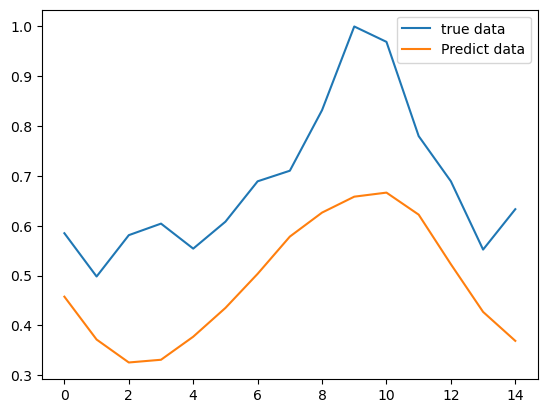

In [61]:
Predict = model.predict(testX)
plt.plot(testY,label = 'true data')
plt.plot(Predict, label="Predict data")
plt.legend()
plt.show()

In [31]:
testX

array([[0.7741313 , 0.57915056, 0.492278  , 0.3976834 , 0.44980696,
        0.49420848, 0.45945945, 0.5830116 , 0.5637065 , 0.61003864,
        0.71042466, 0.8571429 , 0.8783784 , 0.69305015],
       [0.57915056, 0.492278  , 0.3976834 , 0.44980696, 0.49420848,
        0.45945945, 0.5830116 , 0.5637065 , 0.61003864, 0.71042466,
        0.8571429 , 0.8783784 , 0.69305015, 0.5849421 ],
       [0.492278  , 0.3976834 , 0.44980696, 0.49420848, 0.45945945,
        0.5830116 , 0.5637065 , 0.61003864, 0.71042466, 0.8571429 ,
        0.8783784 , 0.69305015, 0.5849421 , 0.4980695 ],
       [0.3976834 , 0.44980696, 0.49420848, 0.45945945, 0.5830116 ,
        0.5637065 , 0.61003864, 0.71042466, 0.8571429 , 0.8783784 ,
        0.69305015, 0.5849421 , 0.4980695 , 0.58108103],
       [0.44980696, 0.49420848, 0.45945945, 0.5830116 , 0.5637065 ,
        0.61003864, 0.71042466, 0.8571429 , 0.8783784 , 0.69305015,
        0.5849421 , 0.4980695 , 0.58108103, 0.6042471 ],
       [0.49420848, 0.45945945, 0.5

In [34]:
predictY = []
liste_train = testX


for i in range(0,10):
    predict_train = model.predict(liste_train)
    predictY.append(float(predict_train[-1]))
    
    if look_back != 1 :
        oui = list(liste_train[-1][1:])
    else: 
        oui = []
        
    oui.append(predictY[-1])
   
    liste_train = np.concatenate((liste_train, [oui]))
    

print(liste_train)

1/1 [==============================] - 0s 19ms/step
[[0.7741313  0.57915056 0.49227801 0.39768341 0.44980696 0.49420848
  0.45945945 0.58301163 0.56370652 0.61003864 0.71042466 0.85714293
  0.87837839 0.69305015]
 [0.57915056 0.49227801 0.39768341 0.44980696 0.49420848 0.45945945
  0.58301163 0.56370652 0.61003864 0.71042466 0.85714293 0.87837839
  0.69305015 0.5849421 ]
 [0.49227801 0.39768341 0.44980696 0.49420848 0.45945945 0.58301163
  0.56370652 0.61003864 0.71042466 0.85714293 0.87837839 0.69305015
  0.5849421  0.49806949]
 [0.39768341 0.44980696 0.49420848 0.45945945 0.58301163 0.56370652
  0.61003864 0.71042466 0.85714293 0.87837839 0.69305015 0.5849421
  0.49806949 0.58108103]
 [0.44980696 0.49420848 0.45945945 0.58301163 0.56370652 0.61003864
  0.71042466 0.85714293 0.87837839 0.69305015 0.5849421  0.49806949
  0.58108103 0.60424709]
 [0.49420848 0.45945945 0.58301163 0.56370652 0.61003864 0.71042466
  0.85714293 0.87837839 0.69305015 0.5849421  0.49806949 0.58108103
  0.6042

In [35]:
np.random.normal(0,predict_train[-1]/100 )

array([0.0148869])

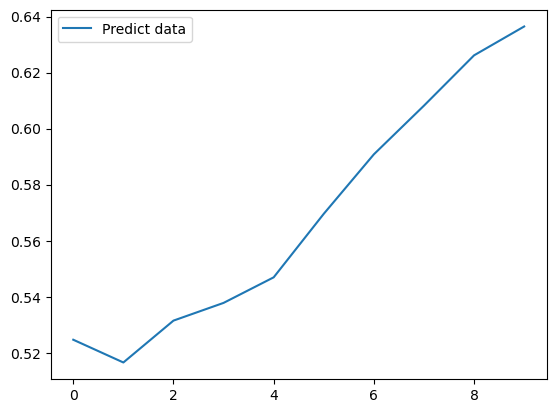

In [36]:
plt.plot(predictY, label="Predict data")
plt.legend()
plt.show()

In [23]:
len(df_stock)


144

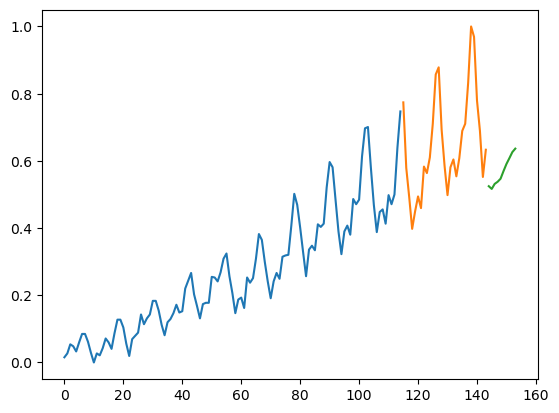

In [37]:
plt.plot(range(0,train_size), train)
plt.plot(range(train_size, len(df_stock)), test)
plt.plot(range(len(df_stock),len(df_stock)+len(predictY)),predictY, label="futut")